# Задание 1

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
ds = datasets.make_blobs(n_samples = 1500, centers = 2 , center_box = (-7.5,7.0),cluster_std = [1.4,1.7],random_state=42)

(array([ 4.17143114,  1.47552198, -1.09165564, ..., -3.34966823,
        -4.27033436, -0.73313038]),
 array([ 3.43973466, -0.44660853,  6.83623698, ..., -1.84144376,
        -1.31774984, -5.27307777]))

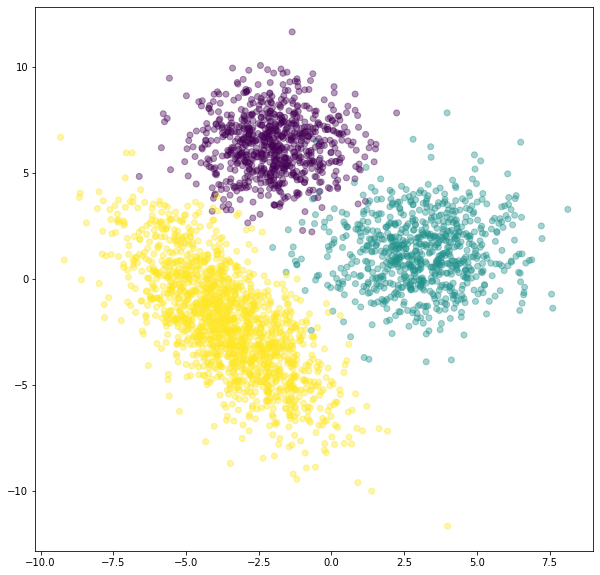

In [3]:
X_2,_= datasets.make_blobs(n_samples = 1500, random_state=170 , centers=[[-4,-3]],cluster_std = [1.4])
transformation=[[1.2,-0.8], [-0.4,1.7]]
X_2 = np.dot(X_2, transformation)
X = np.concatenate((ds[0][:,0], X_2[:,0]))
y = np.concatenate((ds[0][:,1], X_2[:,1]))
color = np.concatenate((ds[1], np.array([2]*len(X_2))))
plt.rcParams['figure.figsize']= 10,10
plt.scatter(X,y,c=color,alpha = 0.4)
X,y

In [4]:
unique, counts=np.unique(color, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Центроиды:
[-3.38460635 -2.34689763]
[3.20844212 1.25447168]
[-2.375875    5.98916061]


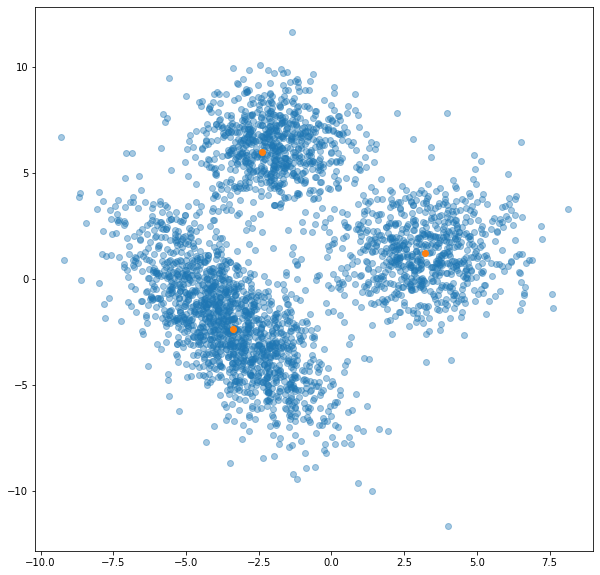

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state = 42
                )
dt = np.concatenate([np.reshape(X,(X.shape[0],1)),np.reshape(y,(y.shape[0],1))],axis = 1)
k_means.fit(dt)
y_kmeans = k_means.predict(dt)
clusters = k_means.cluster_centers_
print('Центроиды:',*clusters,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(clusters[:,0],clusters[:,1])

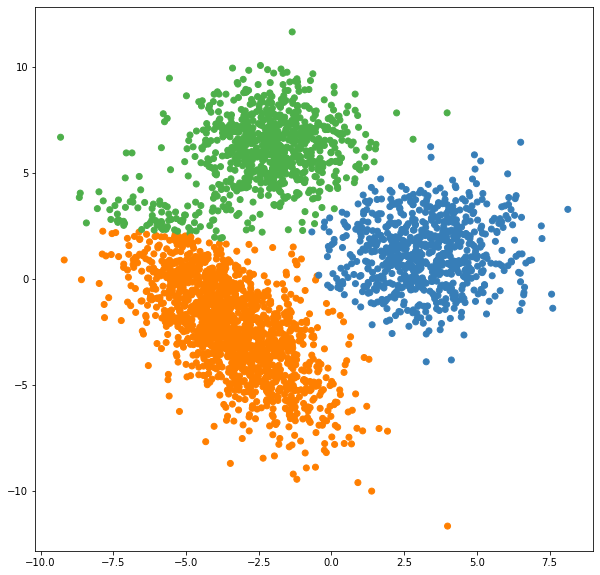

In [6]:
y_km = k_means.fit_predict(dt)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a']),int(max(y_km) + 1))))
plt.scatter(X,y, color=colors[y_km])

# Задание 2

In [7]:
unique, counts = np.unique(y_km, return_counts=True)
dict(zip(unique, counts))


{0: 724, 1: 1427, 2: 849}

# Задание 3

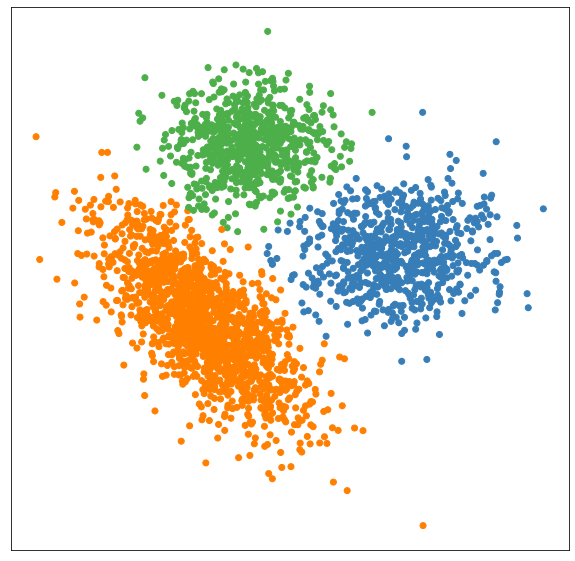

In [8]:
from sklearn import mixture
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']),int(max(y_pred) + 1))))
plt.scatter(X,y, color=colors[y_pred])


Центроиды:
[3.1131007  1.24211411]
[-3.55837274 -2.05615535]
[-1.99676245  6.30344946]


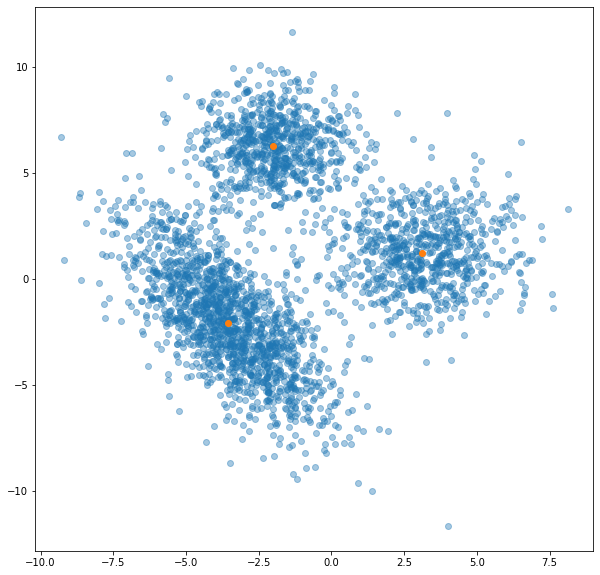

In [9]:
print('Центроиды:',*GM.means_,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(GM.means_[:,0],GM.means_[:,1])


# Задание 4

In [10]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 743, 1: 1498, 2: 759}

# Задание 5

In [11]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dt)

AgglomerativeClustering(n_clusters=3)

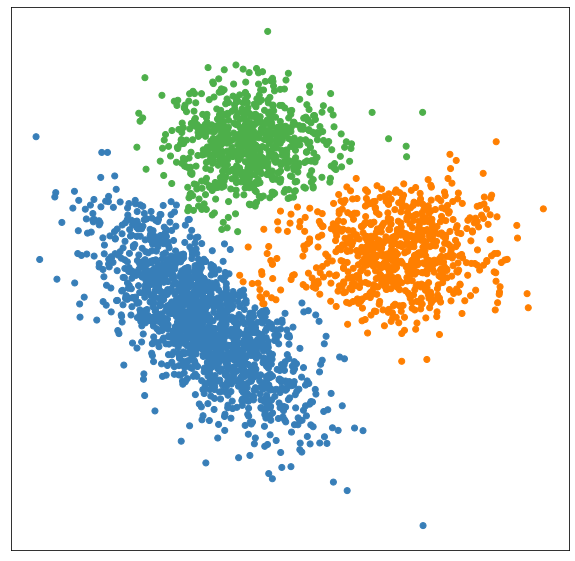

In [12]:
y_pred = ac.labels_.astype(int)

plt.xticks([]); plt.yticks([])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.scatter(X,y, color=colors[y_pred])

# Задание 6

In [13]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1485, 1: 755, 2: 760}

# Задание 7

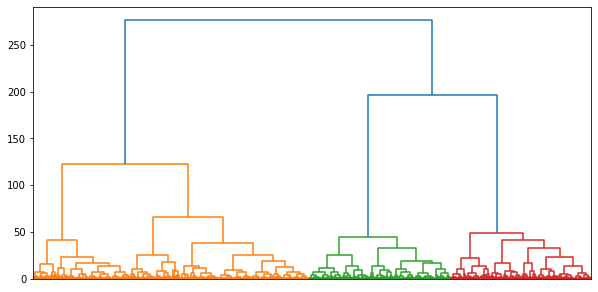

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
Z = hierarchy.linkage(dt, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, no_labels = True)
plt.show()